In [ ]:
# https://universe.roboflow.com/water-rg4td/water_bodies-jhuyf/dataset/1
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aQtezwwShZ5PLACCdz9e")
project = rf.workspace("water-rg4td").project("water_bodies-jhuyf")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Water_Bodies-1 in yolov8:: 100%|██████████| 3355/3355 [00:00<00:00, 4009.59it/s]


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/112.6 GB disk)


In [ ]:
!yolo task= segment mode= train data=/content/Water_Bodies-1/data.yaml model=yolov8n-seg.pt epochs=20 imgsz=640

100% 6.74M/6.74M [00:00<00:00, 417MB/s]
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Water_Bodies-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt imgsz=640 conf=0.5 source=/content/Water_Bodies-1/valid/images

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs

image 1/333 /content/Water_Bodies-1/valid/images/10002_jpg.rf.1caba1781ac9f3bf458241561cb319be.jpg: 640x640 1 Water, 18.2ms
image 2/333 /content/Water_Bodies-1/valid/images/10005_jpg.rf.76014f12f85f4d97778b54c348b5599a.jpg: 640x640 1 Water, 9.4ms
image 3/333 /content/Water_Bodies-1/valid/images/10006_jpeg_jpg.rf.ed1e31e3bd8eff7ce99996fad36d4aaf.jpg: 640x640 1 Water, 9.4ms
image 4/333 /content/Water_Bodies-1/valid/images/10007_jpg.rf.6a136cb1d202a8d6c20cdbf6a2bfe0d1.jpg: 640x640 3 Waters, 9.4ms
image 5/333 /content/Water_Bodies-1/valid/images/10012_jpg.rf.9cb2fc65fa112b9409f534ed00929360.jpg: 640x640 1 Water, 9.4ms
image 6/333 /content/Water_Bodies-1/valid/images/10016_jpg.rf.6464813b36e89781471566506feb3433.jpg: 640x640 1 Water, 9.4ms
image 7/333 /content/Water_Bodies-1/valid/images/10017_jpg.rf.acfdbb1b85ca9b55f00fe8

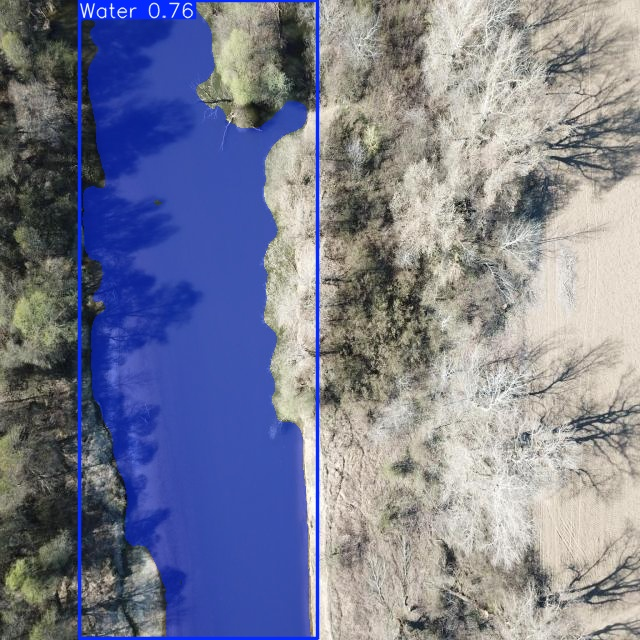

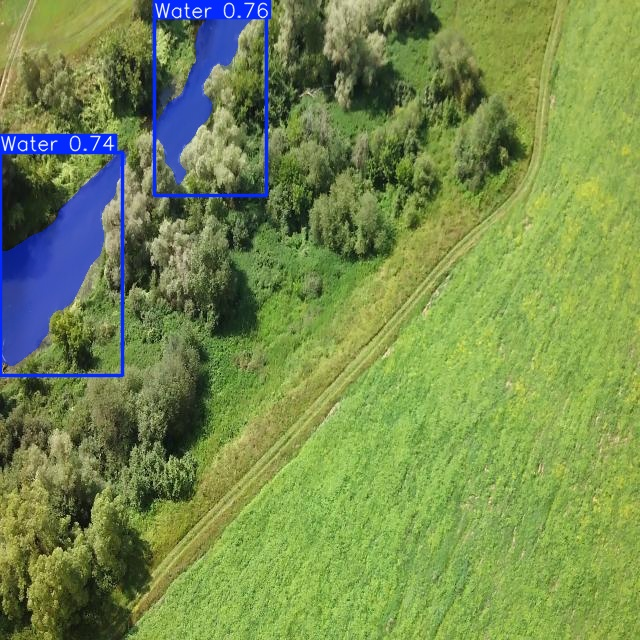

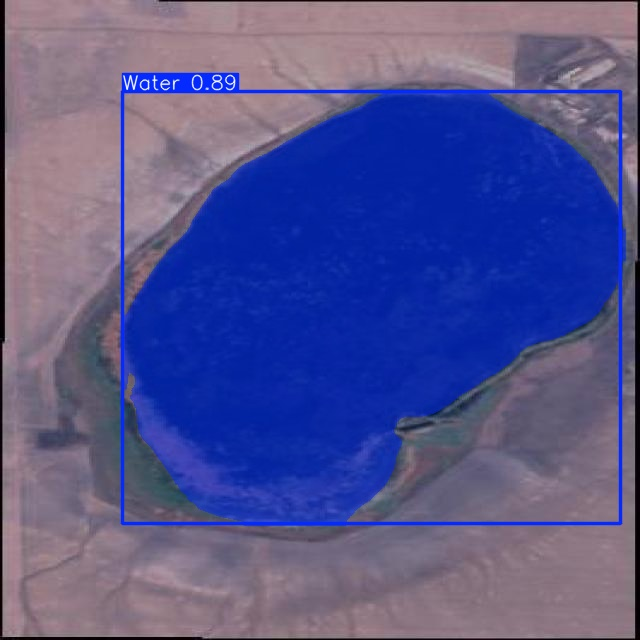

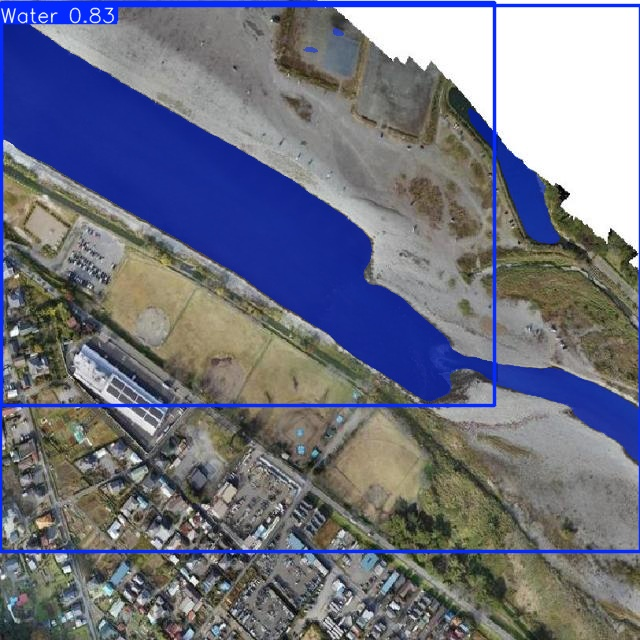

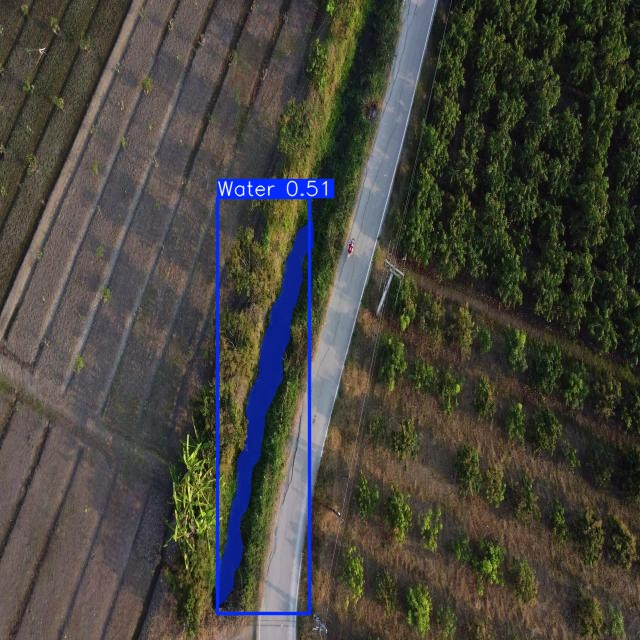

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob("/content/runs/segment/predict/*.jpg")[:5]: #assuming JPG

    print("\n\n")
    display(Image(filename=imageName))

In [ ]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt imgsz=640 conf=0.5 source='/content/water.jpg'

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,259 parameters, 0 gradients, 12.0 GFLOPs

image 1/1 /content/water.jpg: 544x640 1 Water, 46.2ms
Speed: 4.7ms preprocess, 46.2ms inference, 615.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


Befor


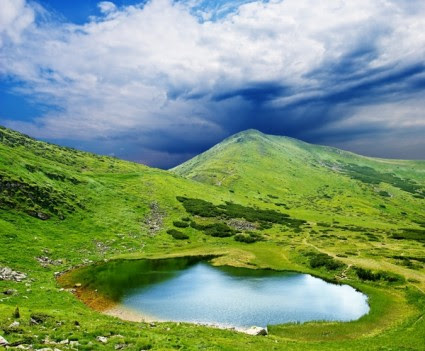



After


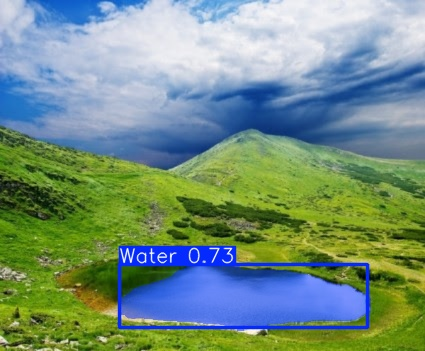

In [ ]:
import glob
from IPython.display import Image, display
print("Befor")
display(Image(filename='/content/water.jpg'))
print('\n')
print('After')
display(Image(filename='/content/runs/segment/predict2/water.jpg'))